# Innovative AI Challenge 2024

<img src="https://github.com/Sakib-Dalal/Crop_Recommendation_AI_App/blob/main/app/client/public/images/Logo.jpg?raw=true" />

#### Project By Sakib Dalal
- GitHub Project repo: <a href="www.github.com">Link</a>
#### problem statement: 
- AI in Agriculture: Develop AI models to enhance intensive agricultural practices and address the future global food crisis.

#### Agriculture Productivity Prediction
- **Objective**: Build an AI/ML model that predicts agricultural productivity based on crop type, weather conditions, soil properties, and other relevant factors.
- **Requirements**:
    - Ensure the model is accurate and farmer-friendly.
    - Provide a simple, accessible user interface for farmers to use effectively. Create an interface or a small website to showcase your AI/ML model.
    - Problem analysis, solution overview, methodology, and implementation steps. Short video, codes via challenge website.
- **Scoring**:
    - Submissions will be evaluated based on *Mean Squared Error*.

### Challenge Overview

#### Files
- **train.csv** - The training dataset, which includes the features and target variable (crop_yield in kg/ha).
- **test.csv** - The test dataset, which you will use to generate predictions and submit your solutions.
- **sample_submission.csv** - A sample submission file that shows the correct format for submitting your predictions.
#### Columns
- `id' - A unique identifier for each data point (e.g., 1, 2, 3,…).
- 'Year' - The year of the production (e.g., 2020, 2002).
- 'State' - The state where the data is collected (e.g., Punjab).
- 'Crop_Type' - The type of crop grown (e.g., Rice, Wheat, Bajra).
- 'Rainfall' - The amount of annual average state rainfall in mm (e.g., 1200 mm).
- 'Soil_Type' - The type of soil in the region (e.g., Loamy).
- 'Irrigation_Area' - Area of irrigated land in Thousand hectare
- 'Crop_Yield' - The target variable representing the crop yield in kg/ha.
#### Notes:
- Data Format: The data is provided in CSV format. Ensure that all files are read correctly and that you handle any missing data appropriately.
- Feature Engineering: While the data is provided in a raw form, you may perform feature engineering and transformations to enhance your model.
- Prediction Goal: Your model should predict agricultural productivity based on the features in the data (for the agriculture problem statement).

<img src="https://images.javatpoint.com/tutorial/machine-learning/images/machine-learning-life-cycle.png" />

# Index

- **Step 1**: Loading Dataset
    - The dataset is provided by the Innovative AI Challenge 2024
    - Link for data set on kaggle: <a href="https://www.kaggle.com/competitions/innovative-ai-challenge-2024/data">dataset</a>
- **Step 2**: Data Preparation
    - We will prepare our data in this step.
    - The dataset is provided into *csv* format.
    - using **polars** we will convert into dataframe.
- **Step 3**: Data Wrangling
    - Look for any **null** values in dataset.
    - Feature Engineering.
- **Step 4**: Analyse Data
    - In this step we will *Analyse* and *Visualise* our data.
    - Here we will select important features to train our *ML* model.
- **Step 5**: Training Model
    - We will use diffent *ML* model's for our *regression problem*.
    - Based on the evaluation we will select a model for testing.
- **Step 6**: Testing Model
    - It it the phase where we will finalize and predict the test data.
- **Step 7**: Deployment
    - Saving best performing model so that we can use in our **Web App**.

# Step 1: Importing Data
- We will import the dataset from kaggle
- The dataset is in csv format.
- here are the links for dataset:
    - train.csv: "/kaggle/input/innovative-ai-challenge-2024/train.csv"
    - test.csv: "/kaggle/input/innovative-ai-challenge-2024/test.csv"
    - sample_submission.csv: "/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv"

In [1]:
TRAIN_URL = "/kaggle/input/innovative-ai-challenge-2024/train.csv"
TEST_URL = "/kaggle/input/innovative-ai-challenge-2024/test.csv"
SUBMISSION_URL = "/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv"

# Step 2: Data Preparation
- We will be using <a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Pandas</a> to convert our dataset from *csv* to *dataframes*.
- **Note**: For future proof project better use **Polars** for data processing.
- We will use **read_csv** method from Pandas to read the csv file and convert into dataframe.

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv(TRAIN_URL)
test_df = pd.read_csv(TEST_URL)

submission_df = pd.read_csv(SUBMISSION_URL)

- Let's view the first five items in our dataset's

In [4]:
train_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [5]:
test_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.7
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.5
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.8
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.9
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.0


In [6]:
submission_df.head()

,id,Target
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0


- Let get from training data
    - information
    - number of columns
    - shape and size
    - description

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [8]:
train_df.columns

Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')

In [9]:
len(train_df.columns)

8

In [10]:
train_df.shape

(55, 8)

- From this we get to now:
    - There are total 8 columns
    - **Crop_Yield (kg/ha)** is the target columns
    - There are 55 rows.

In [11]:
train_df.describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.00000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,2009.527273,473.881818,2082.207273,3079.418182
std,16.02082,6.394021,106.836760,1495.190498,1706.608372
min,1.00000,2000.000000,218.900000,1.200000,0.000000
25%,14.50000,2004.000000,391.900000,5.500000,985.500000
50%,28.00000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.50000,2015.000000,561.400000,3393.250000,4305.500000
max,55.00000,2021.000000,662.800000,3515.200000,5188.000000


- let's see unique values and value counts in Year column from `train_df`

In [12]:
train_df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 2021, 2020])

In [13]:
train_df["Year"].value_counts()

Year
2008    3
2004    3
2016    3
2015    3
2000    3
2001    3
2002    3
2010    3
2009    3
2003    3
2007    3
2006    3
2005    3
2021    2
2019    2
2018    2
2011    2
2013    2
2014    2
2017    2
2020    2
Name: count, dtype: int64

- Let's see unique values and value count's in State column in train_df

In [14]:
train_df["State"].unique()

array(['Punjab'], dtype=object)

In [15]:
train_df["State"].value_counts()

State
Punjab    55
Name: count, dtype: int64

- Let's see unique values and value count's in Crop Type column in train_df

In [16]:
train_df["Crop_Type"].unique()

array(['Wheat', 'Rice', 'Bajra'], dtype=object)

In [17]:
train_df["Crop_Type"].value_counts()

Crop_Type
Wheat    19
Rice     18
Bajra    18
Name: count, dtype: int64

- Let's see unique values and value count's in Soil_Type column in train_df

In [18]:
train_df["Soil_Type"].unique()

array(['Loamy', 'alluvial'], dtype=object)

In [19]:
train_df["Soil_Type"].value_counts()

Soil_Type
Loamy       37
alluvial    18
Name: count, dtype: int64

# Step 3: Data Wrangling
- In this step we will look for any null values in our *training* dataset.
- For this we will be using **Pandas** library

In [20]:
train_df.isna().sum()

id                    0
Year                  0
State                 0
Crop_Type             0
Rainfall              0
Soil_Type             0
Irrigation_Area       0
Crop_Yield (kg/ha)    0
dtype: int64

- there are no null values given by pandas but there are 0 and less ranged values in **Crop_Yield** target column.

In [156]:
(train_df["Crop_Yield (kg/ha)"] == 0).sum()

2

- There are Two values has 0

In [169]:
(train_df["Crop_Yield (kg/ha)"] <= 100).sum()

3

- and there are 3 rows which are less then 100 including 0 values

In [160]:
train_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,0,2,578.6,0,3515.2,5188
1,2,2018,0,2,598.3,0,3499.3,5077
2,3,2017,0,2,493.0,0,3467.7,5046
3,4,2016,0,2,426.7,0,3474.6,4583
4,5,2015,0,2,546.9,0,3474.7,4304
5,6,2014,0,2,384.9,0,3474.7,5017
6,7,2013,0,2,619.7,0,3488.1,4724
7,8,2011,0,2,218.9,0,3466.9,4693
8,9,2010,0,2,472.1,0,3474.8,4307
9,10,2009,0,2,384.9,0,3474.8,4462


- Let's drop the rows with 0 and less than 100 values.
- These values are like anamolies.

In [177]:
train_df = train_df.drop(train_df[train_df["Crop_Yield (kg/ha)"] < 100].index)
# data after cleaning null values
train_df

AttributeError: 'NoneType' object has no attribute 'drop'

- Hence, there are no *null* values in our training dataset.
- Let's see the datatype of each columns in train_df.

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [22]:
for k, v in train_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: object
Crop_Type column has datatype of: object
Rainfall column has datatype of: float64
Soil_Type column has datatype of: object
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


In [23]:
# print columns with datatype as object
for k, v in train_df.items():
    if v.dtype == "object":
        print(k,"column has datatype of:", v.dtype)

State column has datatype of: object
Crop_Type column has datatype of: object
Soil_Type column has datatype of: object


- There are 3 types of data (float64, int64, object)
- We can train our model on float64, int64 datatype but we get an error when we pass object datatype to our model
- **Solution**: To overcome this problem we can use **Sklearn Preprocessing's** *<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html"> LabelEncoder </a>*.

In [24]:
# Label Encoder to deal with object datatypes
from sklearn.preprocessing import LabelEncoder

- before moving one we create a copy of `train_df` dataframe so we can reuse the original when we needed.

In [25]:
train_cp_df = train_df.copy()
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [26]:
label_encoder = LabelEncoder()

# Encoding labels in columns
train_cp_df["State"] = label_encoder.fit_transform(train_cp_df["State"])
train_cp_df["Crop_Type"] = label_encoder.fit_transform(train_cp_df["Crop_Type"])
train_cp_df["Soil_Type"] = label_encoder.fit_transform(train_cp_df["Soil_Type"])

- `train_cp_df` dataset after *LabelEncoding*.

In [27]:
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,0,2,578.6,0,3515.2,5188
1,2,2018,0,2,598.3,0,3499.3,5077
2,3,2017,0,2,493.0,0,3467.7,5046
3,4,2016,0,2,426.7,0,3474.6,4583
4,5,2015,0,2,546.9,0,3474.7,4304


In [28]:
for k, v in train_cp_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: int64
Crop_Type column has datatype of: int64
Rainfall column has datatype of: float64
Soil_Type column has datatype of: int64
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


In [29]:
# old dataset info
for k, v in train_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: object
Crop_Type column has datatype of: object
Rainfall column has datatype of: float64
Soil_Type column has datatype of: object
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


- We have successfuly encoded the object datatypes in out dataset.

### Feature Scaling
- our `train_cp_df` dataset contains features that highly vary in magnitudes, units, and range.
- here is visualization for all the features.
- We will be using matplotlib and seaborn for visualization.

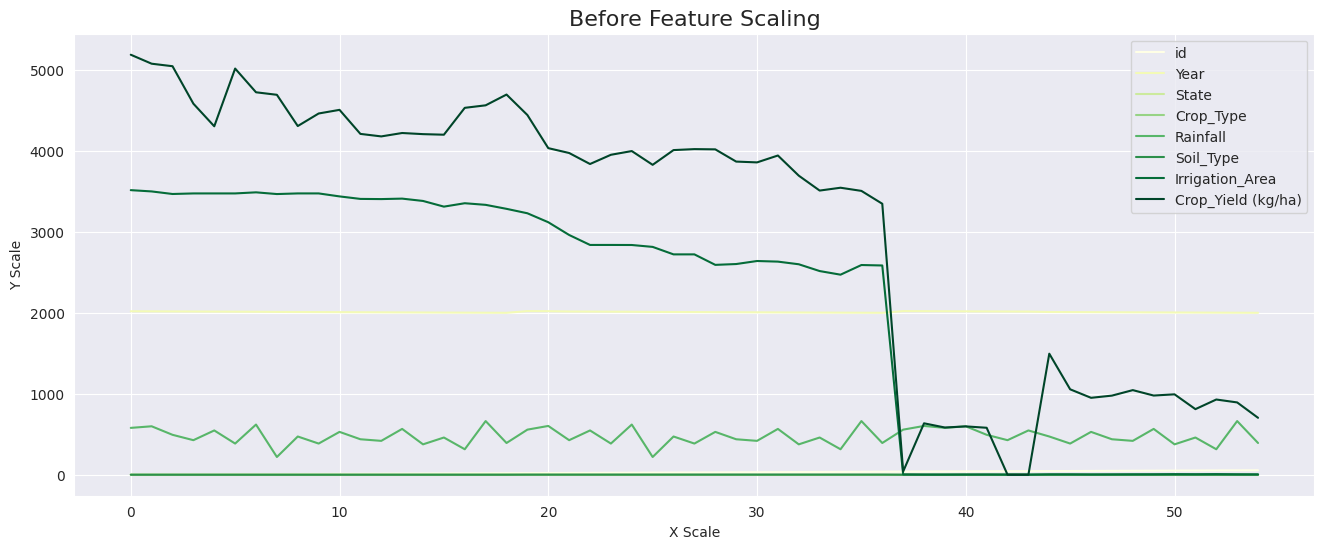

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

train_cp_df.plot(figsize=(16, 6), cmap="YlGn")
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

- Here is the histogram view.

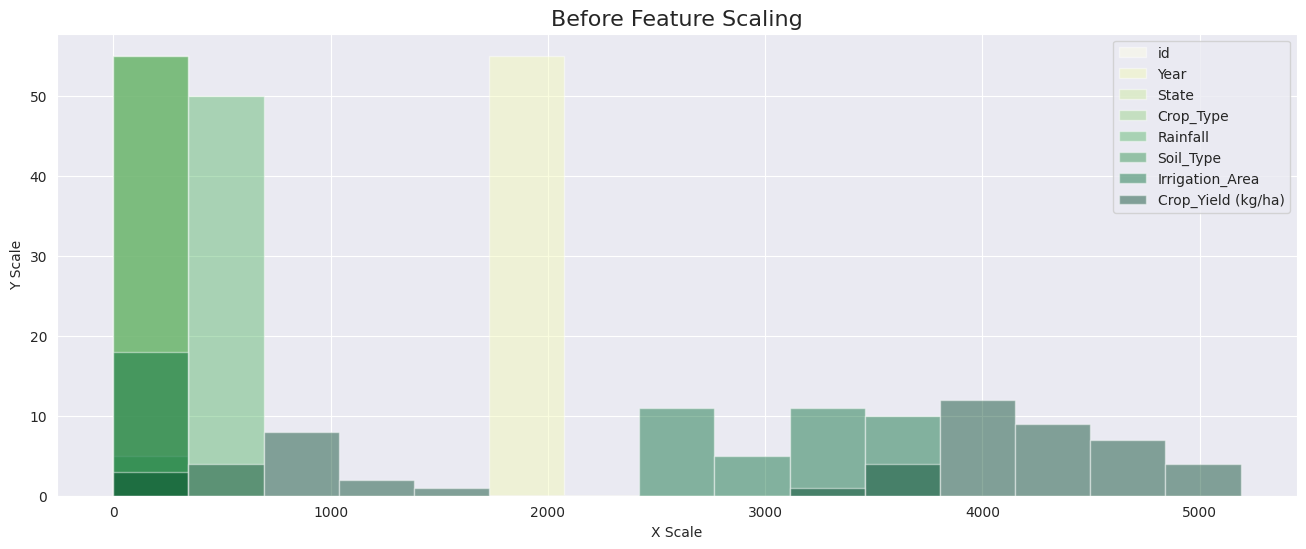

In [31]:
train_cp_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

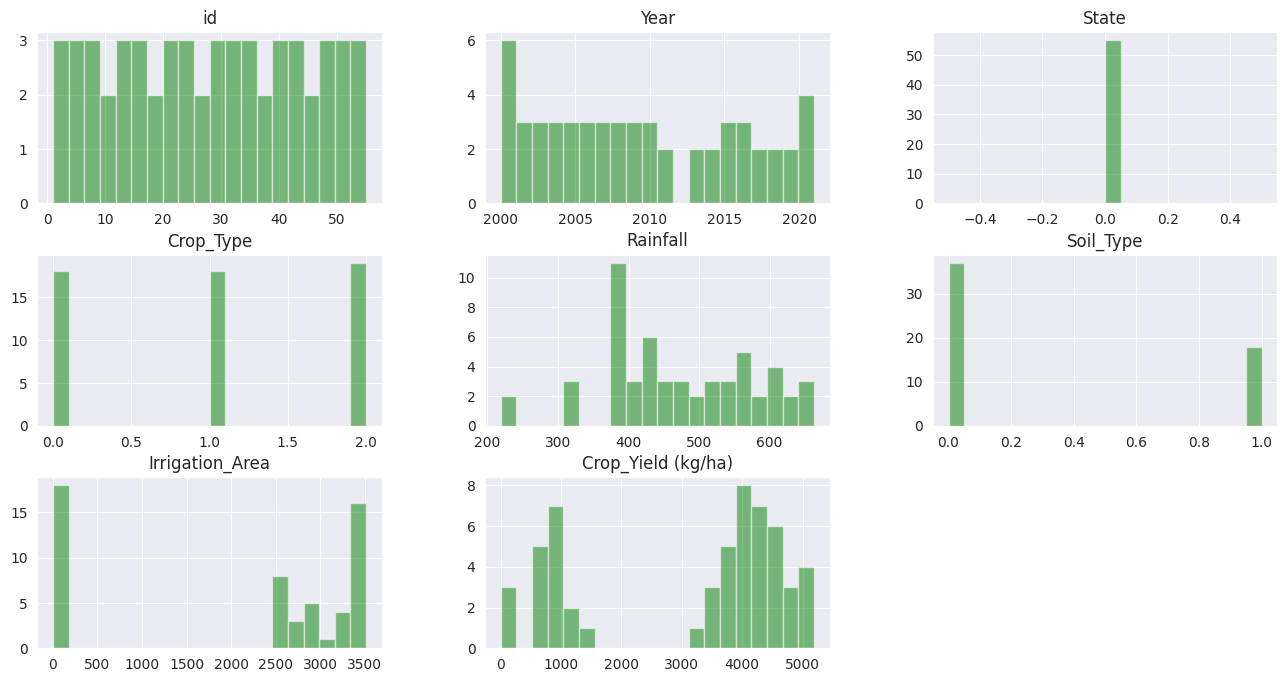

In [32]:
train_cp_df.hist(figsize=(16, 8), bins=20, color=["Green"], alpha=0.5)
plt.show()

- Let's perform feature scaling on out `train_cp_df` dataset.
- We will be using Sklearn's preprocessing method named **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>**
- Formula to perform standard scaling is:<br> $z = (x - u) / s$
- where:
    - z is scaled data
    - x is to be scaled data
    - u is the mean of the training samples
    - s is the standard deviation of the training samples.
- There are also different scaling method provided by sklearn but StandardScaler perform the best.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

# we will apply feature scaling on train_cp_df dataset
train_cp_df = scaler.fit_transform(train_cp_df)

- after standard scaling our data will be no more in dataframe, it will be converted into numpy arrays.
- we will again use the pandas to convert it into dataframe.

In [35]:
type(train_cp_df)

numpy.ndarray

In [36]:
train_cp_df = pd.DataFrame(data=train_cp_df, columns=train_df.columns)
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,-1.700840,1.495152,0.0,1.197342,0.989204,-0.697486,0.967235,1.246927
1,-1.637846,1.337315,0.0,1.197342,1.175297,-0.697486,0.956503,1.181286
2,-1.574852,1.179477,0.0,1.197342,0.180597,-0.697486,0.935173,1.162954
3,-1.511858,1.021640,0.0,1.197342,-0.445696,-0.697486,0.939831,0.889155
4,-1.448864,0.863802,0.0,1.197342,0.689755,-0.697486,0.939898,0.724166


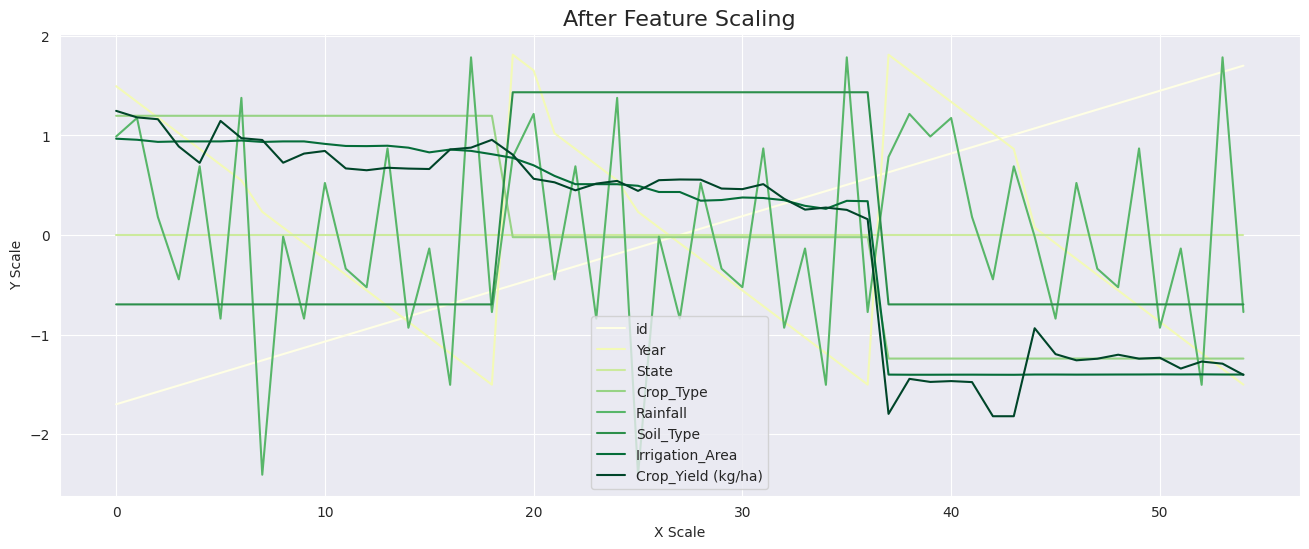

In [37]:
# plot after feature scaling
train_cp_df.plot(figsize=(16, 6), cmap="YlGn")
plt.title("After Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

- Now it's better. Each feature had scaled between 2 to -2.
- here is the histogram view.

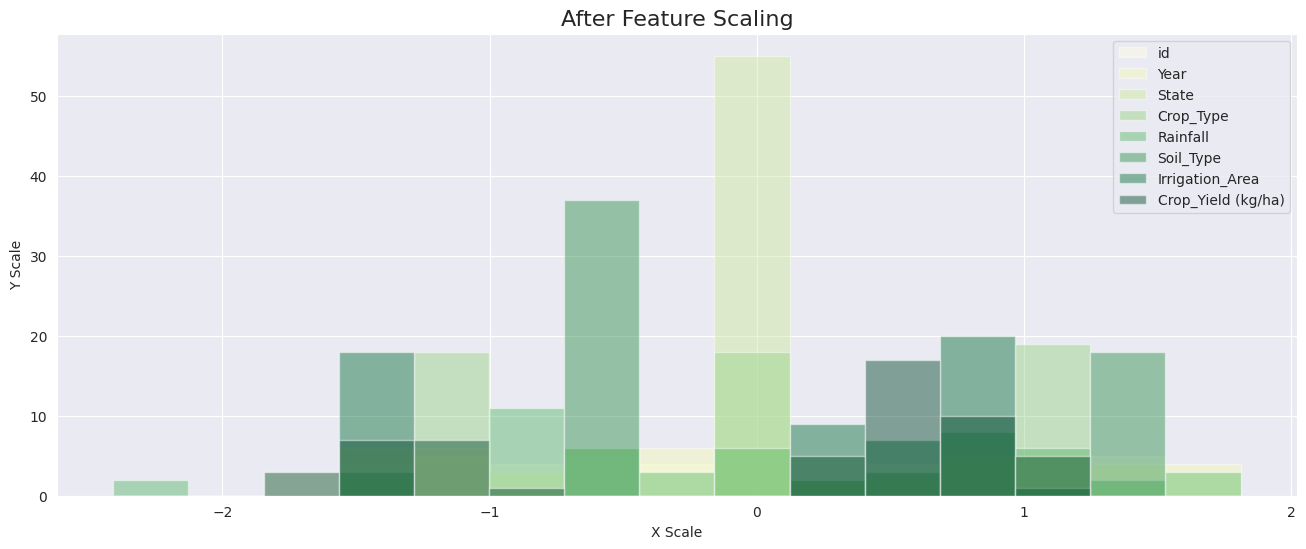

In [38]:
train_cp_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("After Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

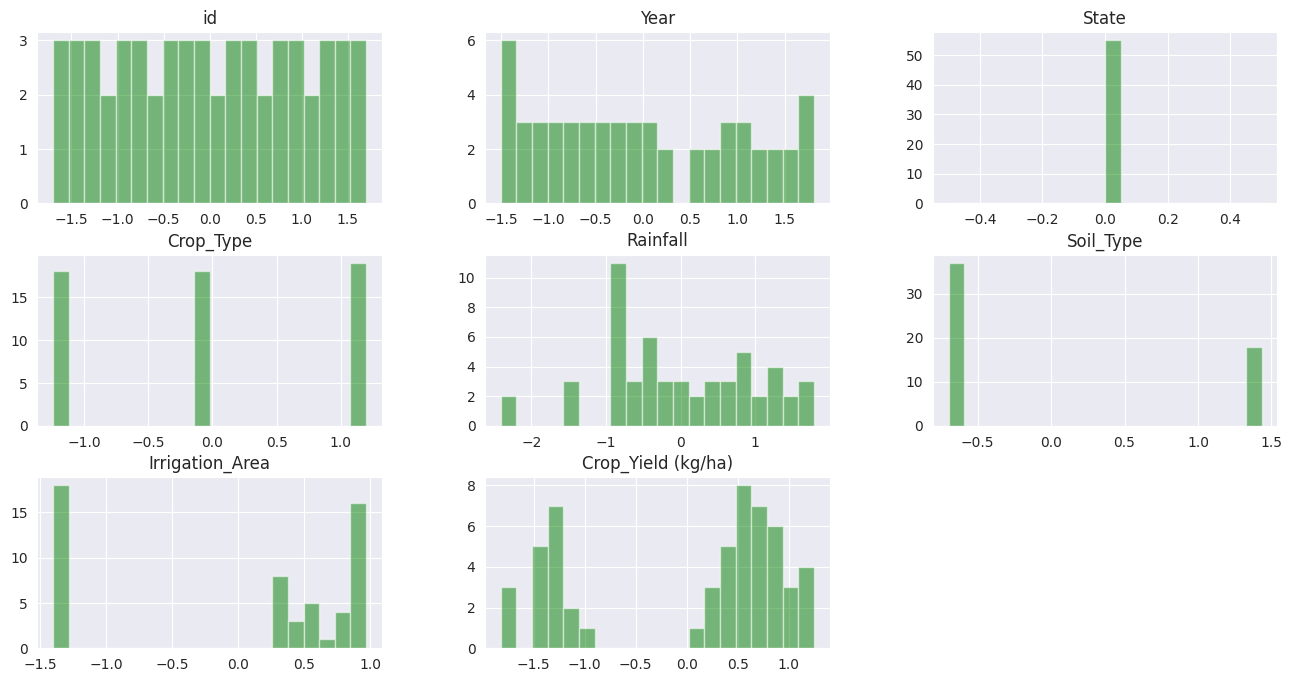

In [39]:
train_cp_df.hist(figsize=(16, 8), bins=20, color="Green", alpha=0.5)
plt.show()

- Now we can easy extract the important features from dataset.

### Extracting Important Features 
- In this step we will select the best features so that our model will perform better.
- In First method of feature extraction we will be using Correlation Matrix
- In Second method of feature extraction we will be using **RandomForest's important features**. 

#### Method 1: Correlation Matrix of training dataset

In [40]:
correlation_matrix = train_cp_df.corr()
correlation_matrix

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
id,1.000000,-0.287800,NaN,-0.942818,-0.007229,0.021969,-0.904073,-0.882291
Year,-0.287800,1.000000,NaN,-0.043842,0.304973,-0.039699,-0.001326,-0.026250
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop_Type,-0.942818,-0.043842,NaN,1.000000,-0.085851,-0.015465,0.942534,0.922752
Rainfall,-0.007229,0.304973,NaN,-0.085851,1.000000,-0.058922,-0.085025,-0.092148
Soil_Type,0.021969,-0.039699,NaN,-0.015465,-0.058922,1.000000,0.309413,0.319877
Irrigation_Area,-0.904073,-0.001326,NaN,0.942534,-0.085025,0.309413,1.000000,0.984287
Crop_Yield (kg/ha),-0.882291,-0.026250,NaN,0.922752,-0.092148,0.319877,0.984287,1.000000


- Corelation Matrix for all (including labels)

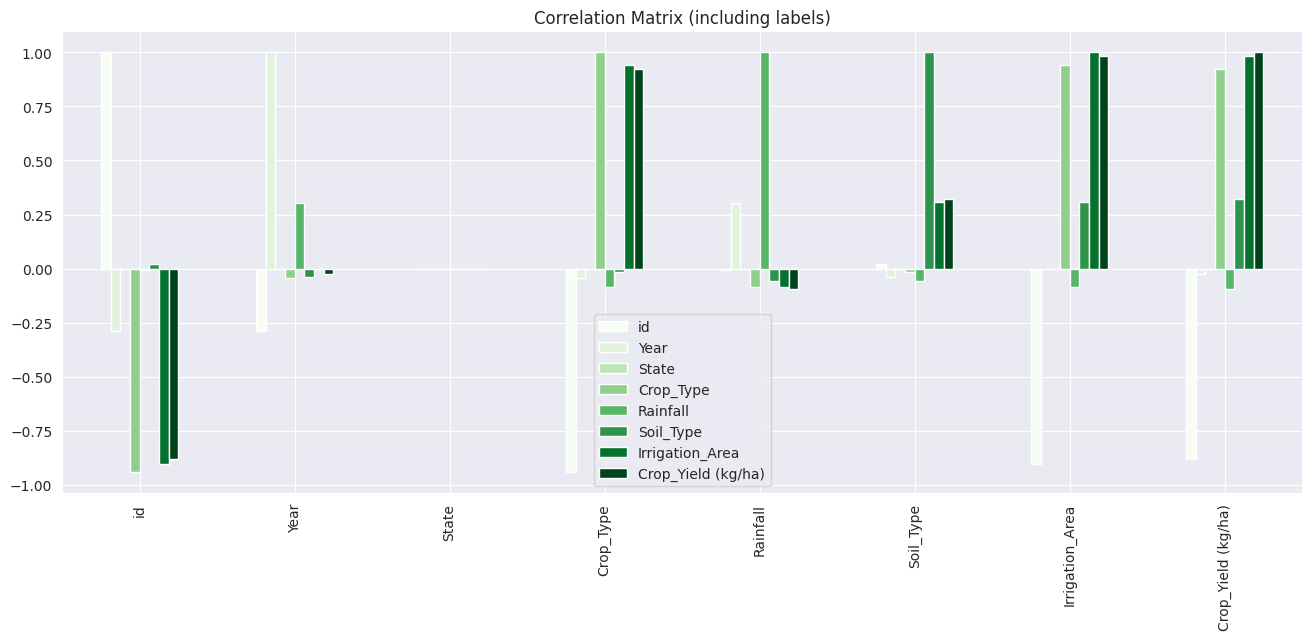

In [41]:
# here is the correlation matrix including all feature's and our labels
correlation_matrix.plot(kind="bar", figsize=(16, 6), cmap="Greens")
plt.title("Correlation Matrix (including labels)")
plt.show()

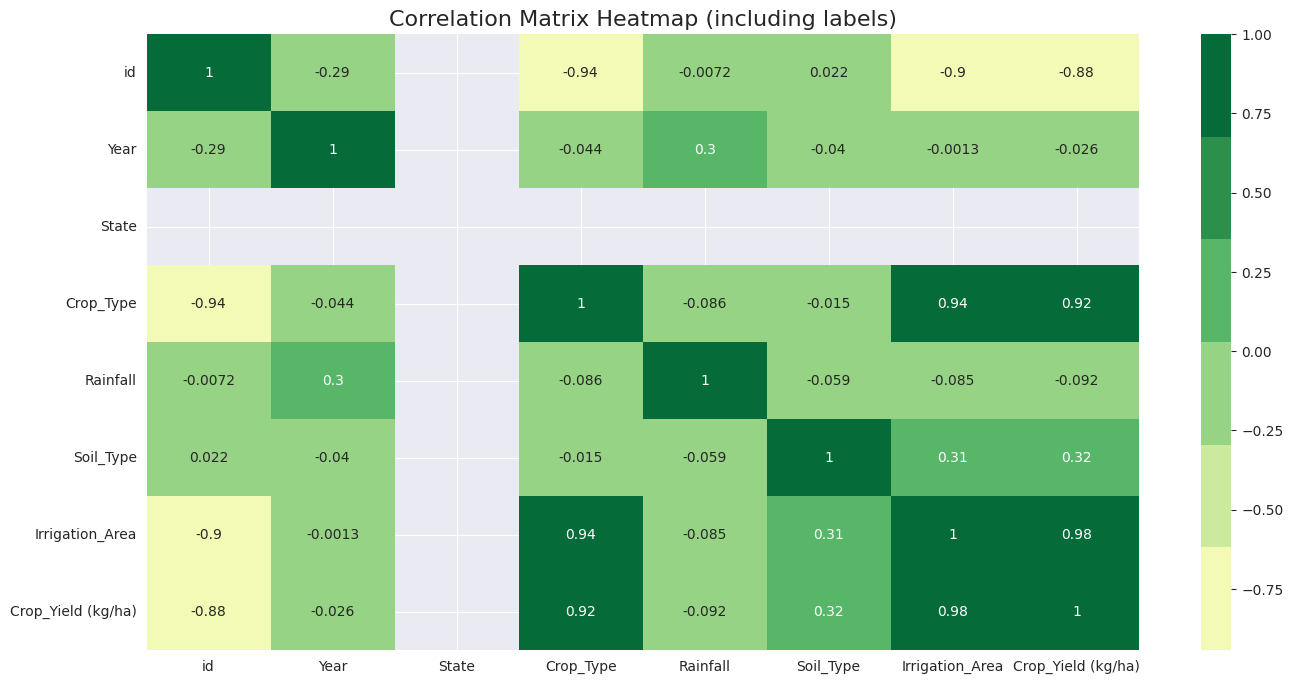

In [42]:
# let's visualize the correlation matrix more better using heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("YlGn"))
plt.title("Correlation Matrix Heatmap (including labels)", fontsize=16)
plt.show();

- Corelation Matrix on the basis of **Crop_Yield (kg/ha)** *(labels)*.

In [43]:
correlation_matrix["Crop_Yield (kg/ha)"].sort_values(ascending=False)

Crop_Yield (kg/ha)    1.000000
Irrigation_Area       0.984287
Crop_Type             0.922752
Soil_Type             0.319877
Year                 -0.026250
Rainfall             -0.092148
id                   -0.882291
State                      NaN
Name: Crop_Yield (kg/ha), dtype: float64

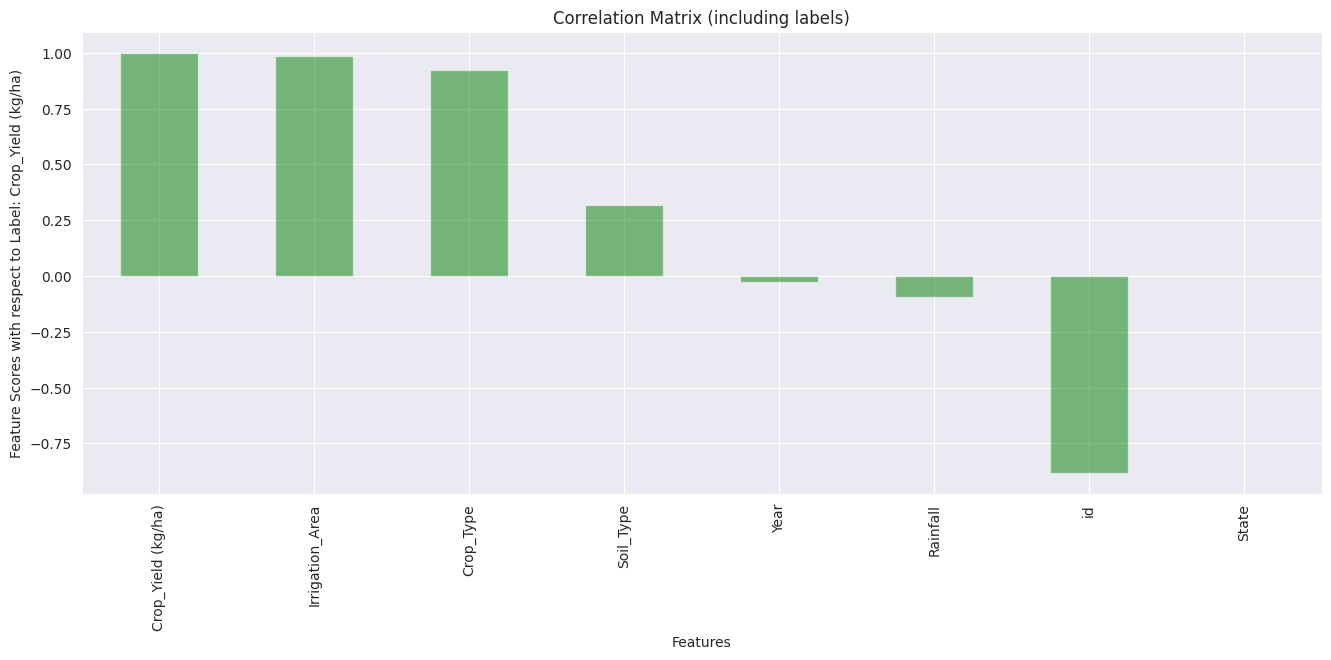

In [44]:
# in visualization form
correlation_matrix["Crop_Yield (kg/ha)"].sort_values(ascending=False).plot(kind="bar", figsize=(16, 6), color="green", alpha=0.5)
plt.title("Correlation Matrix (including labels)")
plt.xlabel("Features")
plt.ylabel("Feature Scores with respect to Label: Crop_Yield (kg/ha)")
plt.show()

- after finding Correlation Matrix for training dataset we can say
    - The **State** Feature doesn't share any feature importance to our target value **Crop_Yield (kg/ha)**.
    - The feature **Irrigation_Area** has 98.4% of correleation with our target value **Crop_Yield (kg/ha)**.
    - The feature **Crop_Type** has 92.2% correlation with our traget value **Crop_Yield (kg/ha)**.
    - The feature **Soil_Type** has 31.9% correlation with our target value **Crop_Yield (kg/ha)**.

#### Method 2: Using Random Forest to find the important features

In [45]:
from sklearn.ensemble import RandomForestRegressor

- Applying random forest on training dataset to find the best features.

In [46]:
# using train_cp_df for feature importance (already scaled features)
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,-1.700840,1.495152,0.0,1.197342,0.989204,-0.697486,0.967235,1.246927
1,-1.637846,1.337315,0.0,1.197342,1.175297,-0.697486,0.956503,1.181286
2,-1.574852,1.179477,0.0,1.197342,0.180597,-0.697486,0.935173,1.162954
3,-1.511858,1.021640,0.0,1.197342,-0.445696,-0.697486,0.939831,0.889155
4,-1.448864,0.863802,0.0,1.197342,0.689755,-0.697486,0.939898,0.724166


In [47]:
# split into X and y 
X = train_cp_df.drop("Crop_Yield (kg/ha)", axis=1)
y = train_cp_df["Crop_Yield (kg/ha)"]

# Applying RandomForestRegressor
feature_extract = RandomForestRegressor(n_estimators=1000, random_state=42)
feature_extract.fit(X, y)

RandomForestRegressor(n_estimators=1000, random_state=42)

- Here are some of the best features found using Random Forest Regression method.

In [48]:
feature_extract.feature_importances_

array([0.42808444, 0.00951191, 0.        , 0.23679833, 0.00295982,
       0.00264814, 0.31999737])

- let's view in more better way.

In [49]:
# Displaying feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_extract.feature_importances_}, index=X.columns)
print(feature_importance[1:].sort_values(by='Importance', ascending=False))

                         Feature  Importance
Irrigation_Area  Irrigation_Area    0.319997
Crop_Type              Crop_Type    0.236798
Year                        Year    0.009512
Rainfall                Rainfall    0.002960
Soil_Type              Soil_Type    0.002648
State                      State    0.000000


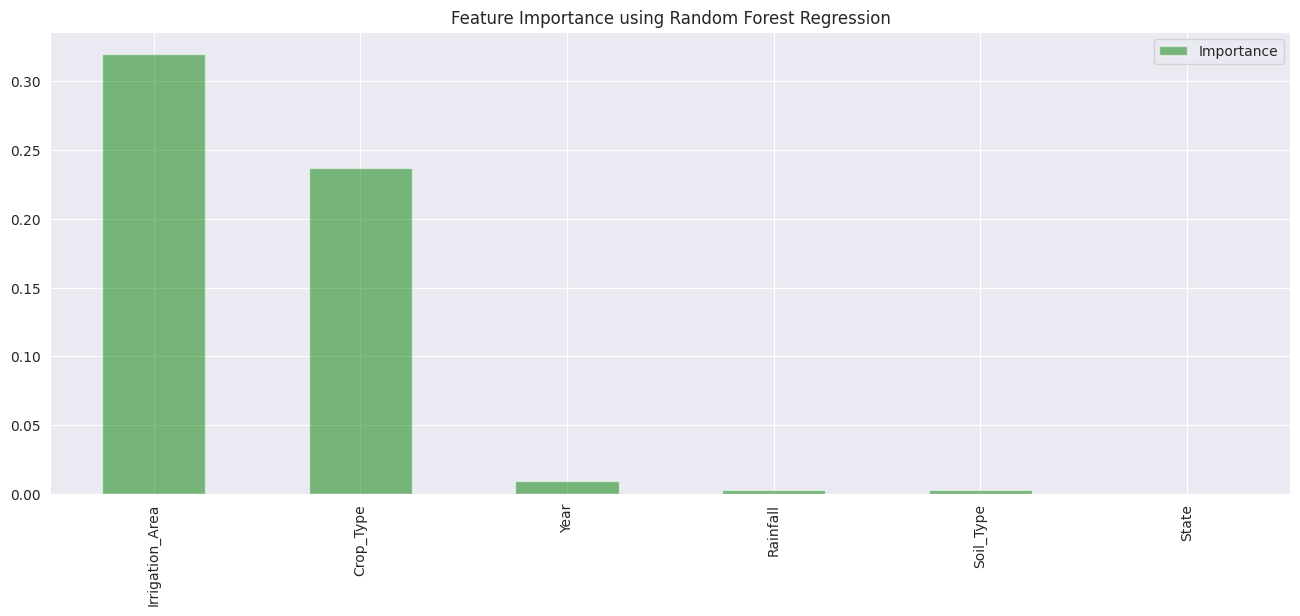

In [50]:
# Bar graph visualization
feature_importance[1:].sort_values(by='Importance', ascending=False).plot(kind="bar", color="green", alpha=0.5, figsize=(16, 6))
plt.title("Feature Importance using Random Forest Regression")
plt.show()

- after finding best feature using random forest regression we know:
    - the feature **Irrigation_Area** shares the highest importance of 31.9%
    - the feature **State** shares the lowest importance of 0%
    - we will cont cosider id feature as it's is not a feature.

### Final Outcome for Feature Importance
- After using both **Correlation Matrix** and **Random Forest Regression**, the best features we got are:
    - **Irrigation_Area**
    - **Crop_Type**
    - **Year**
    - **Rainfall**
    - **Soil_Type**

# Step 4: Analyse Data

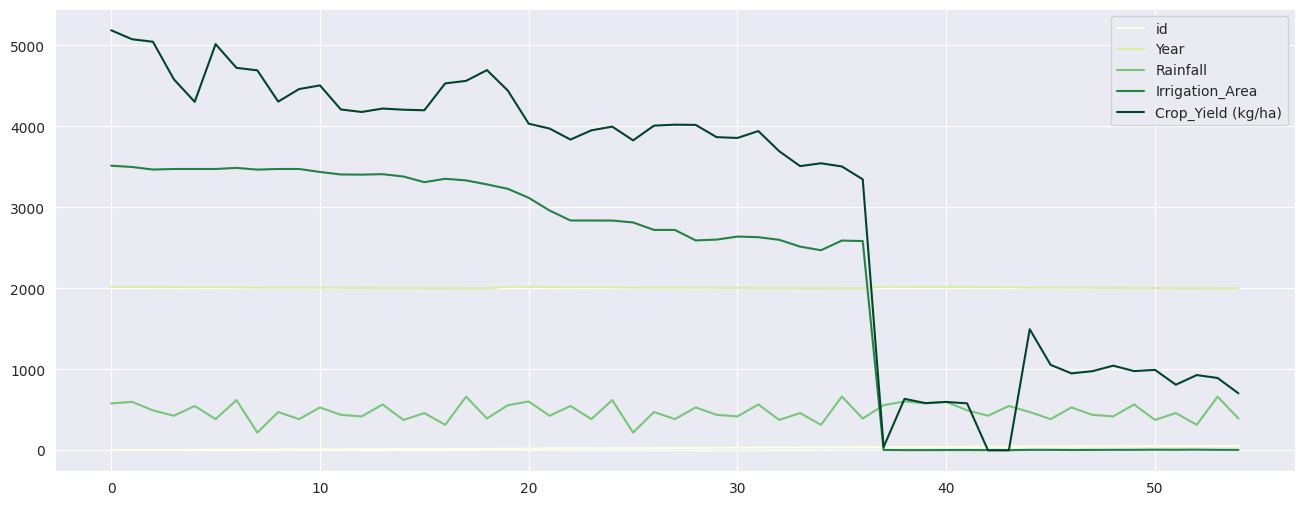

In [51]:
# before processing the training data
train_df.plot(cmap="YlGn", figsize=(16, 6))
plt.show()

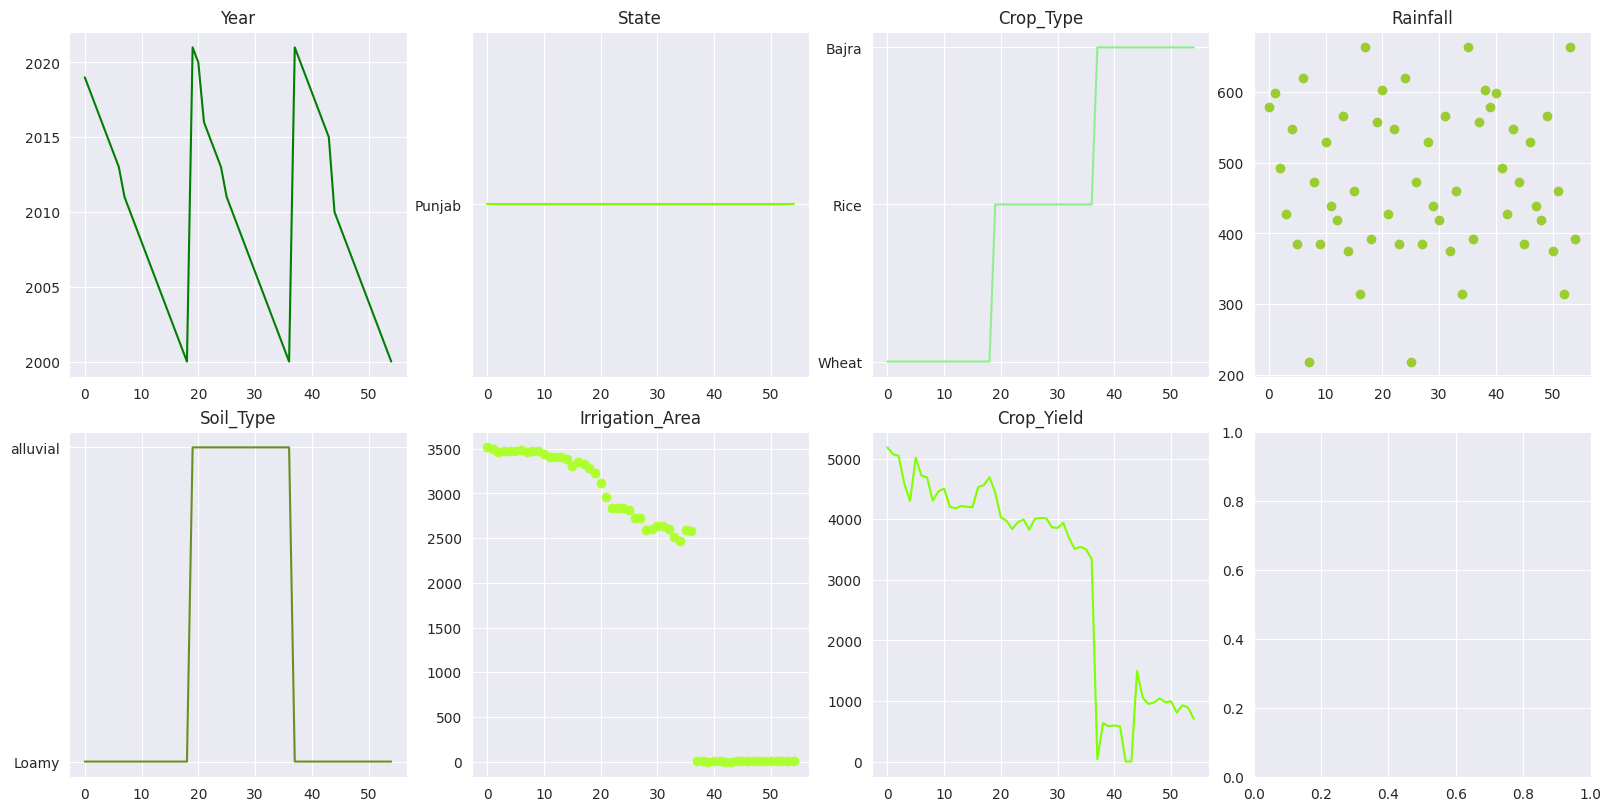

In [52]:
# before processing the training data
fig, axs = plt.subplots(2, 4, layout="constrained", figsize=(16, 8))

ax = axs[0][0]
ax.plot(train_df.index, train_df["Year"], color="g")
ax.set_title("Year")

ax = axs[0, 1]
ax.plot(train_df["State"], color="lawngreen")
ax.set_title("State")

ax = axs[0, 2]
ax.plot(train_df["Crop_Type"], color="lightgreen")
ax.set_title("Crop_Type")

ax = axs[0, 3]
ax.scatter(train_df.index, train_df["Rainfall"], color="yellowgreen")
ax.set_title("Rainfall")

ax = axs[1, 0]
ax.plot(train_df["Soil_Type"], color="olivedrab")
ax.set_title("Soil_Type")

ax = axs[1, 1]
ax.scatter(train_df.index, train_df["Irrigation_Area"], color="greenyellow")
ax.set_title("Irrigation_Area")

ax = axs[1, 2]
ax.plot(train_df["Crop_Yield (kg/ha)"], color="chartreuse")
ax.set_title("Crop_Yield")

plt.show()

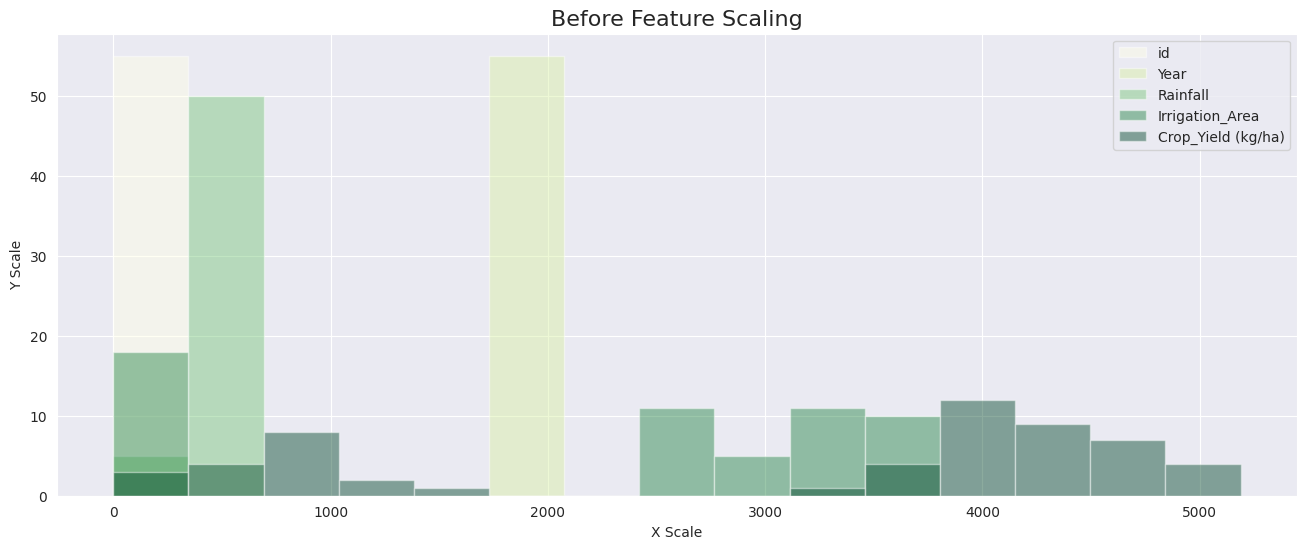

In [53]:
# before processing the training data
train_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

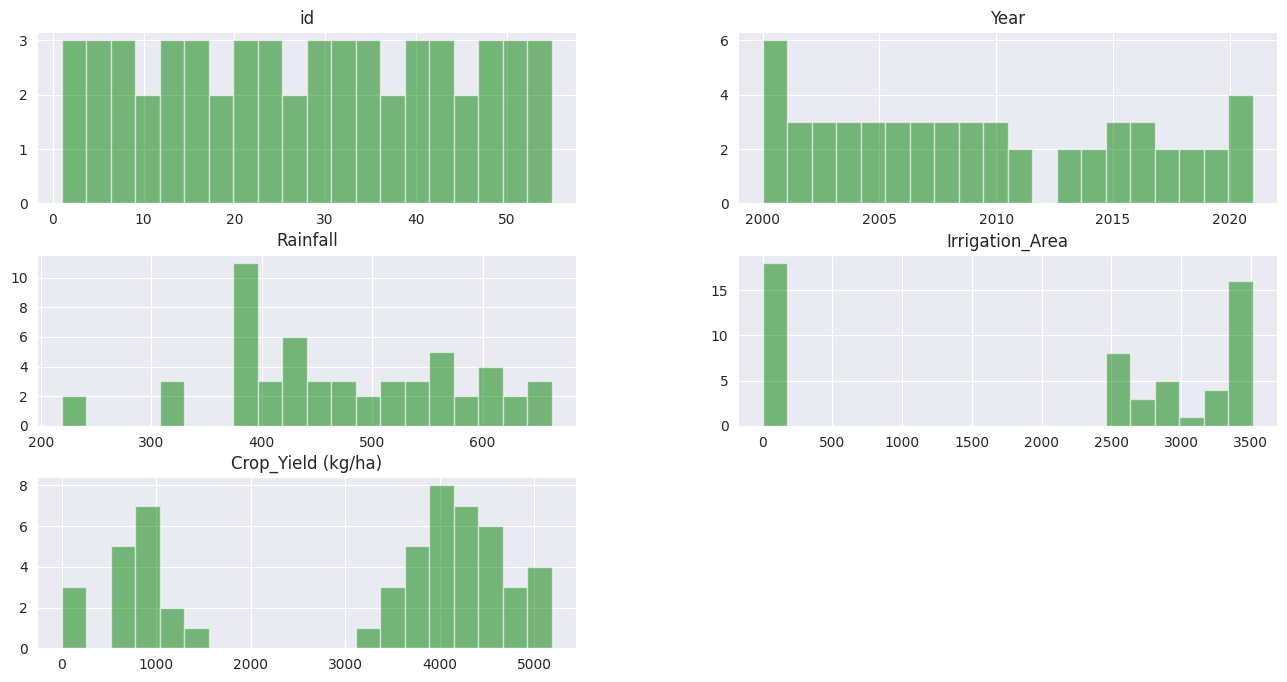

In [54]:
# before processing the training data
train_df.hist(figsize=(16, 8), bins=20, color="Green", alpha=0.5)
plt.show()

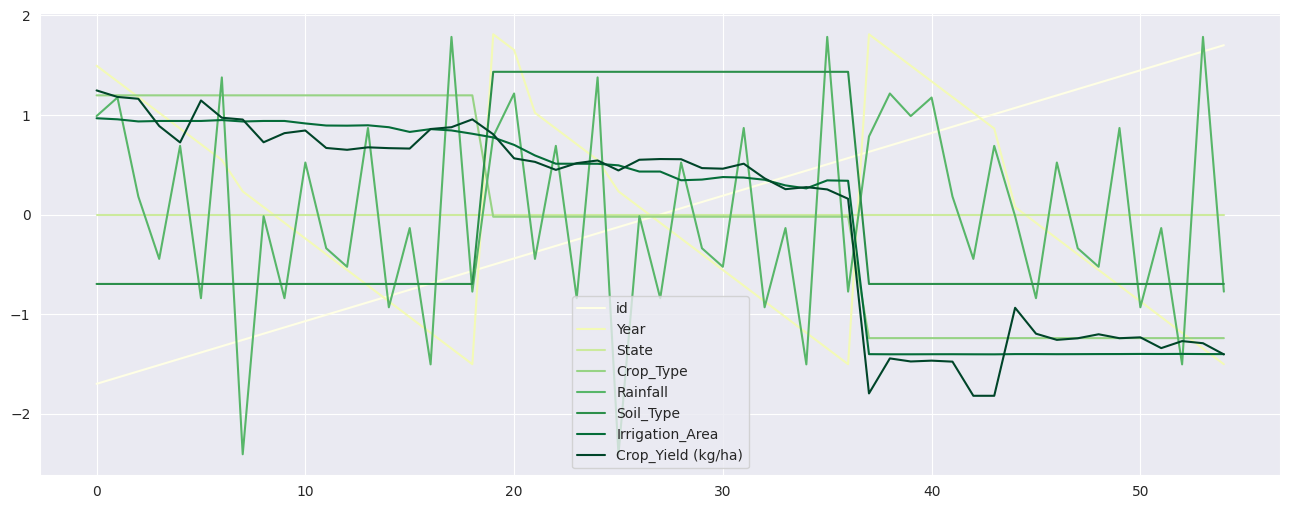

In [55]:
# after processing the training data
train_cp_df.plot(cmap="YlGn", figsize=(16, 6))
plt.show()

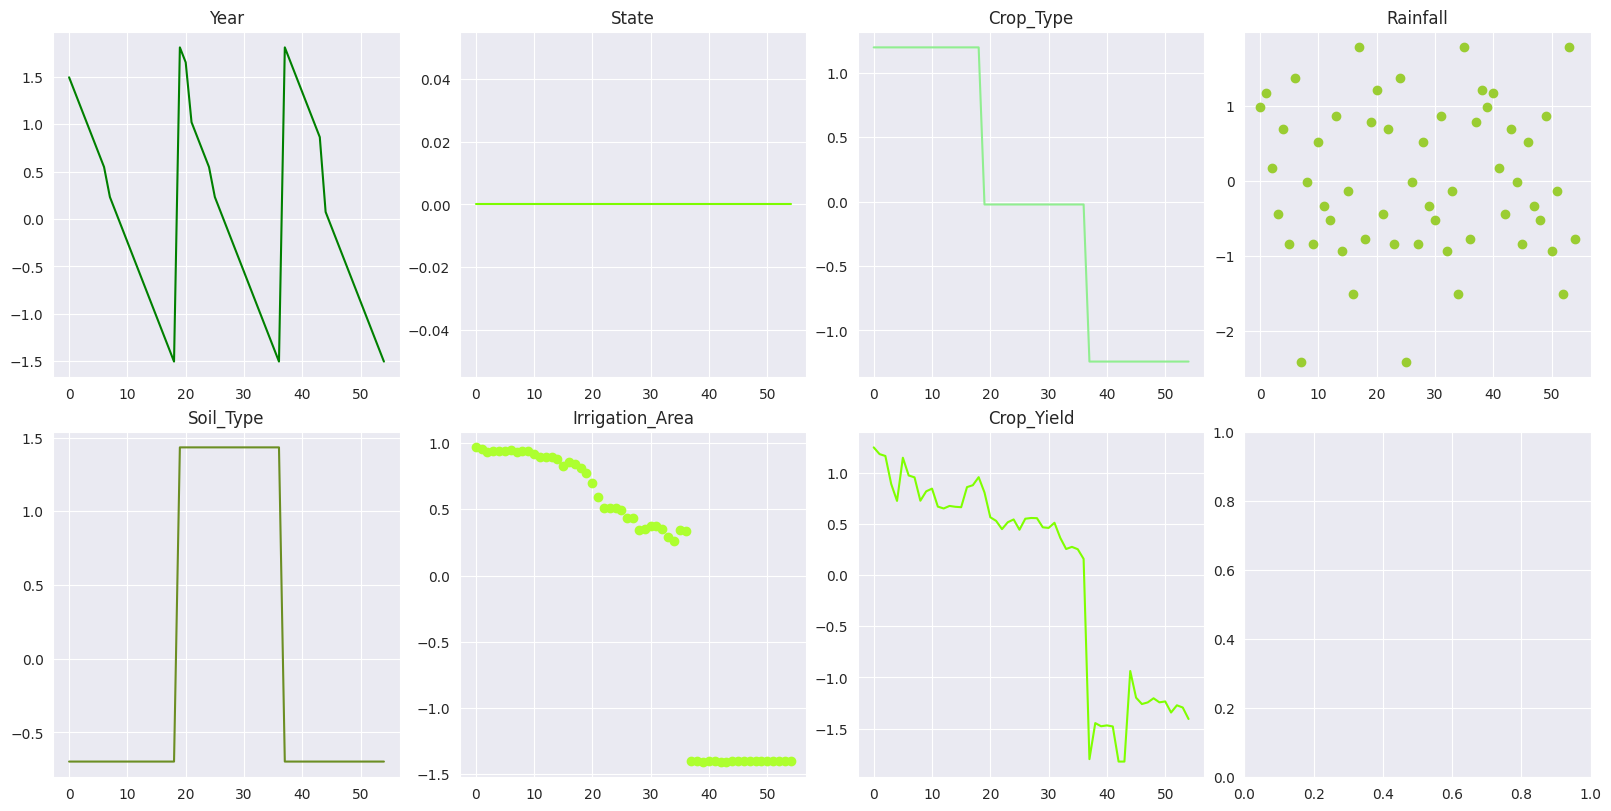

In [56]:
# before processing the training data
fig, axs = plt.subplots(2, 4, layout="constrained", figsize=(16, 8))

ax = axs[0][0]
ax.plot(train_cp_df.index, train_cp_df["Year"], color="g")
ax.set_title("Year")

ax = axs[0, 1]
ax.plot(train_cp_df["State"], color="lawngreen")
ax.set_title("State")

ax = axs[0, 2]
ax.plot(train_cp_df["Crop_Type"], color="lightgreen")
ax.set_title("Crop_Type")

ax = axs[0, 3]
ax.scatter(train_cp_df.index, train_cp_df["Rainfall"], color="yellowgreen")
ax.set_title("Rainfall")

ax = axs[1, 0]
ax.plot(train_cp_df["Soil_Type"], color="olivedrab")
ax.set_title("Soil_Type")

ax = axs[1, 1]
ax.scatter(train_cp_df.index, train_cp_df["Irrigation_Area"], color="greenyellow")
ax.set_title("Irrigation_Area")

ax = axs[1, 2]
ax.plot(train_cp_df["Crop_Yield (kg/ha)"], color="chartreuse")
ax.set_title("Crop_Yield")

plt.show()

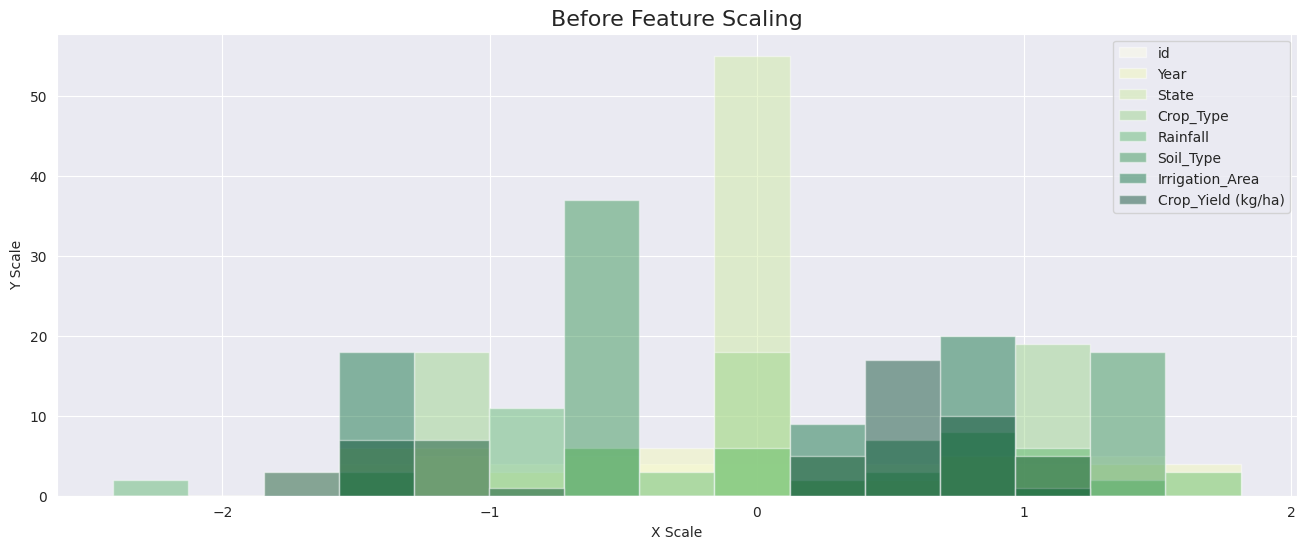

In [57]:
# after processing the training data
train_cp_df.plot(figsize=(16, 6), cmap="YlGn", kind="hist", alpha=0.45, bins=15)
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

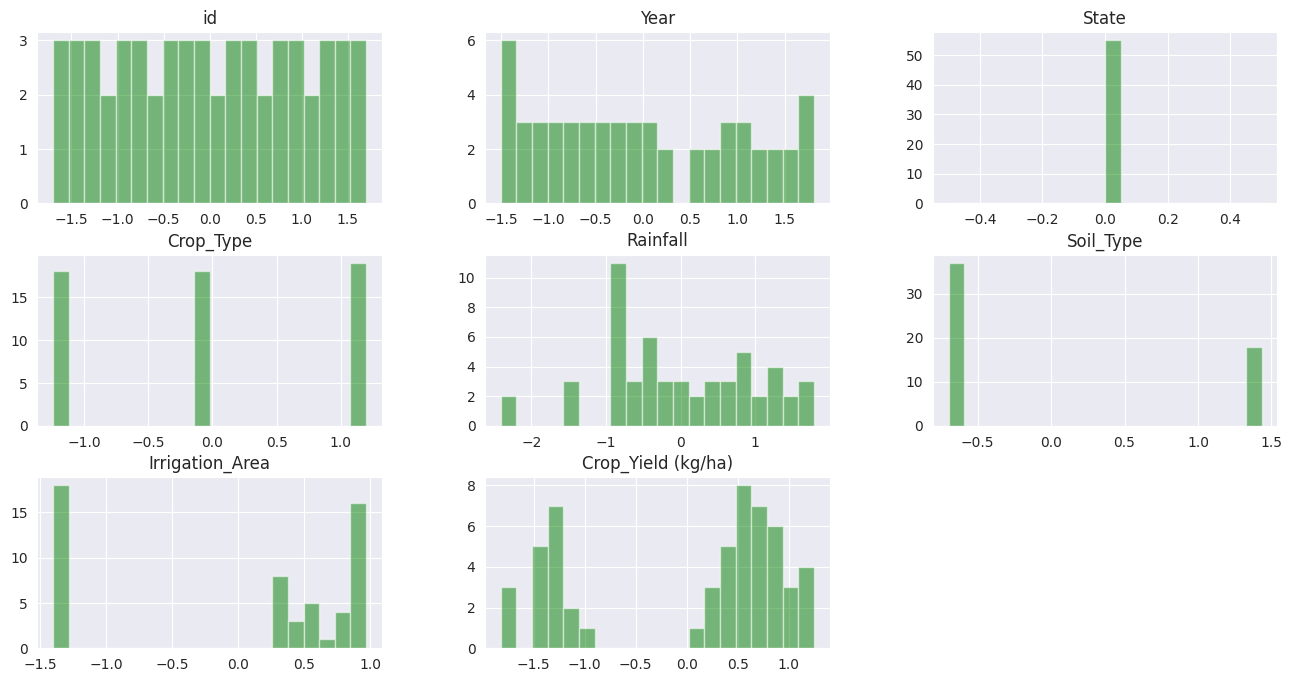

In [58]:
# after processing the training data
train_cp_df.hist(figsize=(16, 8), bins=20, color="Green", alpha=0.5)
plt.show()

# Step 5: Training ML Model

In [147]:
#MLP
from sklearn.neural_network import MLPRegressor

X = train_cp_df.drop(["Crop_Yield (kg/ha)", "State", "id", "Rainfall"], axis=1) 

model = MLPRegressor(hidden_layer_sizes=[4, 1000, 1], activation="relu", solver="lbfgs", learning_rate_init=0.001, random_state=42, max_iter=1000)
model.fit(X, y)

MLPRegressor(hidden_layer_sizes=[4, 1000, 1], max_iter=1000, random_state=42,
             solver='lbfgs')

In [148]:
model.score(X, y)

0.986765756523523

In [151]:
y_pred = model.predict(X)

In [152]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_pred)

37844.0784771902

In [153]:
y

0     5188
1     5077
2     5046
3     4583
4     4304
5     5017
6     4724
7     4693
8     4307
9     4462
10    4507
11    4210
12    4179
13    4221
14    4207
15    4200
16    4532
17    4563
18    4696
19    4443
20    4034
21    3974
22    3838
23    3952
24    3998
25    3828
26    4010
27    4022
28    4019
29    3868
30    3858
31    3943
32    3694
33    3510
34    3545
35    3506
36    3347
37      40
38     635
39     583
40     597
41     580
42       0
43       0
44    1495
45    1055
46     950
47     977
48    1045
49     978
50     993
51     810
52     929
53     893
54     703
Name: Crop_Yield (kg/ha), dtype: int64

- After using both **Correlation Matrix** and **Random Forest Regression**, the best features we got are:
    - **Irrigation_Area**
    - **Crop_Type**
    - **Year**
    - **Rainfall**
    - **Soil_Type**

In [ ]:
#MLP
from sklearn.neural_network import MLPRegressor

X = train_cp_df.drop(["Crop_Yield (kg/ha)", "State", "id", "Rainfall"], axis=1) 

model = MLPRegressor(hidden_layer_sizes=[4, 3025, 3025, 1], activation="relu", random_state=42, max_iter=1000)
model.fit(X, y)

In [61]:
import pandas as pd

In [62]:
import polars as pl

In [63]:
data = pd.read_csv("/kaggle/input/innovative-ai-challenge-2024/train.csv")
data

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,6,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,7,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,8,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,9,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,10,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv
/kaggle/input/innovative-ai-challenge-2024/train.csv
/kaggle/input/innovative-ai-challenge-2024/test.csv


In [65]:
# Load data using panadas
train_df = pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/train.csv')
test_df = pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/test.csv')
submission_df= pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv')

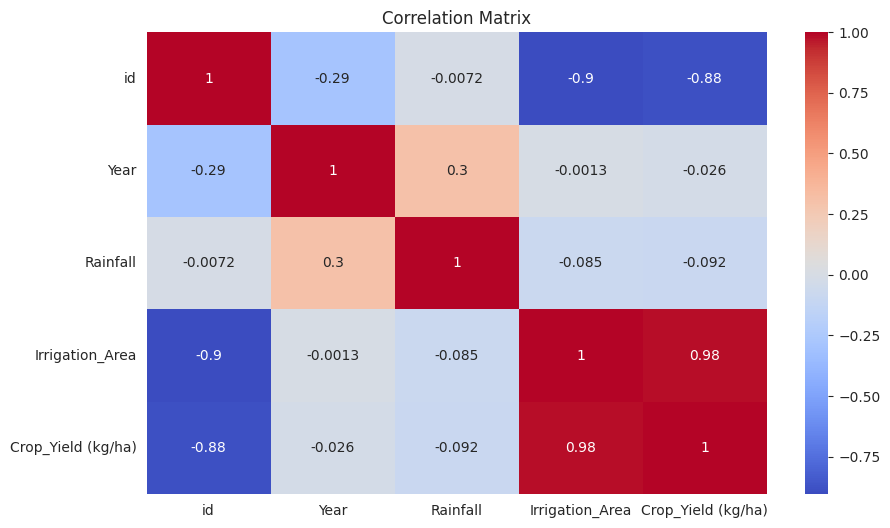

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_data = train_df.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [67]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train_df['Soil_Type']= label_encoder.fit_transform(train_df['Soil_Type']) 
train_df['Crop_Type']= label_encoder.fit_transform(train_df['Crop_Type']) 
train_df['State']= label_encoder.fit_transform(train_df['State']) 

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame and 'target_variable' is the column you want to predict
X = train_df.drop(["Crop_Yield (kg/ha)", "State", "id", "Year"], axis=1)
y = train_df["Crop_Yield (kg/ha)"]

# Applying RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Displaying feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))

           Feature  Importance
0        Crop_Type    0.507592
3  Irrigation_Area    0.482711
1         Rainfall    0.007081
2        Soil_Type    0.002616


In [69]:
test_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.70
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.50
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.80
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.90
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.00
5,1006,2014,Punjab,Bajra,384.9,Loamy,1.20
6,1007,2013,Punjab,Bajra,619.7,Loamy,3.81
7,1008,2011,Punjab,Bajra,218.9,Loamy,2.50


In [70]:
train_df

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,0,2,578.6,0,3515.2,5188
1,2,2018,0,2,598.3,0,3499.3,5077
2,3,2017,0,2,493.0,0,3467.7,5046
3,4,2016,0,2,426.7,0,3474.6,4583
4,5,2015,0,2,546.9,0,3474.7,4304
5,6,2014,0,2,384.9,0,3474.7,5017
6,7,2013,0,2,619.7,0,3488.1,4724
7,8,2011,0,2,218.9,0,3466.9,4693
8,9,2010,0,2,472.1,0,3474.8,4307
9,10,2009,0,2,384.9,0,3474.8,4462


In [71]:
submission_df

,id,Target
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0
5,1006,0
6,1007,0
7,1008,0
